Abundance Convertion

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy.interpolate import Akima1DInterpolator

Deadtime Correction XSM

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy.interpolate import Akima1DInterpolator


#Opening fits file
file=fits.open("paper/ch2_xsm_20240912_1.pha")
print(file.info())

# Load original PHA file

pha_data = file["SPECTRUM"].data
counts = pha_data["COUNTS"].astype(float)
channel=pha_data["CHANNEL"]
#extracting data
data=file[1].data

print(file[1].header)





Filename: paper/ch2_xsm_20240912_1.pha
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  SPECTRUM      1 BinTableHDU     77   512R x 4C   [1J, 1E, 1E, 1E]   
None
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   16 / width of table in bytes                        NAXIS2  =                  512 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    4 / number of fields in each row                   TTYPE1  = 'CHANNEL '           / PI Channel                                     TFORM1  = '1J      '           / data format of f

In [3]:
import scipy
xx_xsm = np.logspace(-1,5)
def par_cr_theoretical(icr,tau): #icr in per sec, tau in sec
    ocr = icr*np.exp(-icr*tau)
    return ocr
yy_xsm = par_cr_theoretical(xx_xsm,tau=5e-6)
f_xsm_puc = scipy.interpolate.Akima1DInterpolator(yy_xsm, xx_xsm, method='makima')




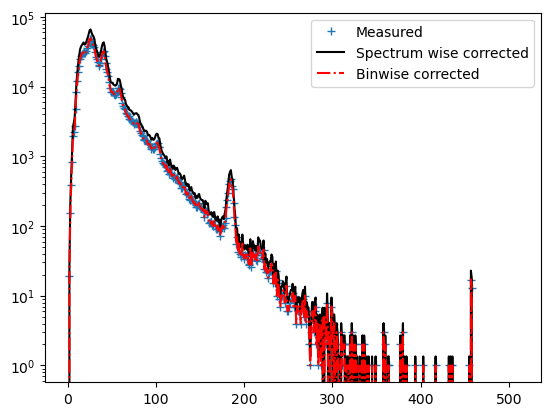

In [7]:
#Binwise correction
rate_corr=f_xsm_puc(counts/30) # Counts/Sec
rate_corr=np.nan_to_num(rate_corr*30,nan=counts) # Counts

#Spectrumwise correction
coun=counts/30 #Counts/Sec
rate_cor=f_xsm_puc(coun.sum())
ratio=rate_cor/(coun.sum())
count=counts*ratio

plt.plot(channel,counts,'+',label='Measured')
plt.plot(channel,count,'-', color='black', label='Spectrum wise corrected')
plt.plot(channel,rate_corr,'-.',color='red', label='Binwise corrected')
plt.yscale('log')
plt.legend()
plt.show()


In [5]:
fi=fits.open("/mnt/c/users/user/downloads/AL1_SOLEXS_20240912_SDD2_L1_puc_tb_fit_results.fits")
da=fi[1].header
d=fi[1].data
temp_=d['TEMPERATURE']
time_sherpa=d['TIME']
fe_abun=d['Fe_Abun']
ar_abun=d['Ar_abun']
ca_abun=d['ca_abun']
s_abun=d['s_abun']
EM=d['EM']
fe_err=d['fe_abun_err']
ar_err=d['Ar_abun_err']
ca_err=d['Ca_abun_err']
s_err=d['s_abun_err']
fe_abun_err=np.add(fe_abun,fe_err)
ar_abun_err=np.add(ar_abun,ar_err)
ca_abun_err=np.add(ca_abun,ca_err)
s_abun_err=np.add(s_abun,s_err)

In [6]:
def abun_convertion(fip_bias):
    coronal_abundance=[]
    if fip_bias is fe_abun :
       photospheric_abundance=7.67  #(photospheric abundances from Grevesse and Anders 1989)
    elif fip_bias is s_abun:
       photospheric_abundance=7.21  
    elif fip_bias is ar_abun:
       photospheric_abundance=6.56
    elif fip_bias is ca_abun:
       photospheric_abundance=6.36
    else:
        raise ValueError("Invalid fip_bias provided")
    #Convert photospheric abundance to linear value
    photospheric_abundance_linear=10**(photospheric_abundance-12)
    for i in range(len(fip_bias)):
          # Calculate coronal abundance to linear value
         coronal_abundance_linear = photospheric_abundance_linear *fip_bias[i]

         # Convert coronal abundance back to logarithmicvalue
         coronal_abundance_log = 12 +np.log10(coronal_abundance_linear)
         coronal_abundance.append(coronal_abundance_log)
    return coronal_abundance

In [7]:
fe_abun_sol=abun_convertion(fe_abun)
ca_abun_sol=abun_convertion(ca_abun)
ar_abun_sol=abun_convertion(ar_abun)
s_abun_sol=abun_convertion(s_abun)

In [8]:
def abun_convertion(fip_bias):
    coronal_abundance=[]
    if fip_bias is fe_abun_err :
       photospheric_abundance=7.67  #(photospheric abundances from Grevesse and Anders 1989)
    elif fip_bias is s_abun_err:
       photospheric_abundance=7.21  
    elif fip_bias is ar_abun_err:
       photospheric_abundance=6.56
    elif fip_bias is ca_abun_err:
       photospheric_abundance=6.36
    else:
        raise ValueError("Invalid fip_bias provided")
    #Convert photospheric abundance to linear value
    photospheric_abundance_linear=10**(photospheric_abundance-12)
    for i in range(len(fip_bias)):
          # Calculate coronal abundance to linear value
         coronal_abundance_linear = photospheric_abundance_linear *fip_bias[i]

         # Convert coronal abundance back to logarithmicvalue
         coronal_abundance_log = 12 +np.log10(coronal_abundance_linear)
         coronal_abundance.append(coronal_abundance_log)
    return coronal_abundance

In [9]:
fe_abun_sol_err=np.add(abun_convertion(fe_abun_err),np.array(fe_abun_sol)*(-1))
ca_abun_sol_err=np.add(abun_convertion(ca_abun_err),np.array(ca_abun_sol)*(-1))
ar_abun_sol_err=np.add(abun_convertion(ar_abun_err),np.array(ar_abun_sol)*(-1))
s_abun_sol_err=np.add(abun_convertion(s_abun_err),np.array(s_abun_sol)*(-1))

In [10]:
fi=fits.open("/mnt/c/users/user/downloads/ch2_xsm_20240912_v1_2409120001_2409120033_fit_results.fits")
da=fi[1].header
d=fi[1].data
temp_x=d['TEMPERATURE']
time_sherpa_x=d['TIME']
fe_abun_x=d['Fe_Abun']
ar_abun_x=d['Ar_abun']
ca_abun_x=d['ca_abun']
s_abun_x=d['s_abun']
EM=d['EM']
fe_err_x=d['fe_abun_err']
ar_err_x=d['Ar_abun_err']
ca_err_x=d['Ca_abun_err']
s_err_x=d['s_abun_err']
fe_abun_err_x=np.add(fe_abun_x,fe_err_x)
ar_abun_err_x=np.add(ar_abun_x,ar_err_x)
ca_abun_err_x=np.add(ca_abun_x,ca_err_x)
s_abun_err_x=np.add(s_abun_x,s_err_x)

In [11]:
def abun_convertion(fip_bias):
    coronal_abundance=[]
    if fip_bias is fe_abun_x :
       photospheric_abundance=7.67  #(photospheric abundances from Grevesse and Anders 1989)
    elif fip_bias is s_abun_x:
       photospheric_abundance=7.21  
    elif fip_bias is ar_abun_x:
       photospheric_abundance=6.56
    elif fip_bias is ca_abun_x:
       photospheric_abundance=6.36
    else:
        raise ValueError("Invalid fip_bias provided")
    #Convert photospheric abundance to linear value
    photospheric_abundance_linear=10**(photospheric_abundance-12)
    for i in range(len(fip_bias)):
          # Calculate coronal abundance to linear value
         coronal_abundance_linear = photospheric_abundance_linear *fip_bias[i]

         # Convert coronal abundance back to logarithmicvalue
         coronal_abundance_log = 12 +np.log10(coronal_abundance_linear)
         coronal_abundance.append(coronal_abundance_log)
    return coronal_abundance

In [12]:
fe_abun_x=abun_convertion(fe_abun_x)
ar_abun_x=abun_convertion(ar_abun_x)
ca_abun_x=abun_convertion(ca_abun_x)
s_abun_x=abun_convertion(s_abun_x)

In [13]:
def abun_convertion(fip_bias):
    coronal_abundance=[]
    if fip_bias is fe_abun_err_x :
       photospheric_abundance=7.67  #(photospheric abundances from Grevesse and Anders 1989)
    elif fip_bias is s_abun_err_x:
       photospheric_abundance=7.21  
    elif fip_bias is ar_abun_err_x:
       photospheric_abundance=6.56
    elif fip_bias is ca_abun_err_x:
       photospheric_abundance=6.36
    else:
        raise ValueError("Invalid fip_bias provided")
    #Convert photospheric abundance to linear value
    photospheric_abundance_linear=10**(photospheric_abundance-12)
    for i in range(len(fip_bias)):
          # Calculate coronal abundance to linear value
         coronal_abundance_linear = photospheric_abundance_linear *fip_bias[i]

         # Convert coronal abundance back to logarithmicvalue
         coronal_abundance_log = 12 +np.log10(coronal_abundance_linear)
         coronal_abundance.append(coronal_abundance_log)
    return coronal_abundance

In [14]:
fe_abun_err_x=np.add(abun_convertion(fe_abun_err_x),np.array(fe_abun_x)*(-1))
ar_abun_err_x=np.add(abun_convertion(ar_abun_err_x),np.array(ar_abun_x)*(-1))
ca_abun_err_x=np.add(abun_convertion(ca_abun_err_x),np.array(ca_abun_x)*(-1))
s_abun_err_x=np.add(abun_convertion(s_abun_err_x),np.array(s_abun_x)*(-1))

In [15]:
f_sol=fits.open("paper/fit_results_solexs.fits")

da_sol=f_sol[1].data

In [16]:
Fe_sol_abun=da_sol['Fe_abun']
Fe_sol_err=da_sol['Fe_err']
S_sol_abun=da_sol['S_abun']
S_sol_err=da_sol['S_err']
Ca_sol_abun=da_sol['Ca_abun']
Ca_sol_err=da_sol['Ca_err']
Ar_sol_abun=da_sol['Ar_abun']
Ar_sol_err=da_sol['Ca_err']
Ca_sol_time=da_sol['timeCa']
S_sol_time=da_sol['timeS']
Fe_sol_time=da_sol['timeFe']
Ar_sol_time=da_sol['timeAr']

In [17]:
f_xsm=fits.open("paper/fit_results_xsm.fits")

da_xsm=f_xsm[1].data

In [18]:
Ar_xsm_abun=da_xsm['Ar_abun']
Ar_xsm_err=da_xsm['Ca_err']
Ca_xsm_time=da_xsm['timeCa']
S_xsm_time=da_xsm['timeS']
Fe_xsm_time=da_xsm['timeFe']
Ar_xsm_time=da_xsm['timeAr']
Fe_xsm_abun=da_xsm['Fe_abun']
Fe_xsm_err=da_xsm['Fe_err']
Ca_xsm_abun=da_xsm['Ca_abun']
Ca_xsm_err=da_xsm['Ca_err']
S_xsm_abun=da_xsm['S_abun']
S_xsm_err=da_xsm['S_err']

In [19]:
time_sol=time_sherpa-time_sherpa[0]
time_xsm=time_sherpa_x-time_sherpa_x[0]

In [23]:
time_xsm

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
        630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
        720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
        810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
        900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,
        990., 1000., 1010., 1020., 1030., 1040., 1050., 1060., 1070.,
       1080., 1090., 1100., 1110., 1120., 1130., 1140., 1150., 1160.,
       1170., 1180., 1190., 1200., 1210., 1220., 1230., 1240., 1250.,
       1260., 1270.,

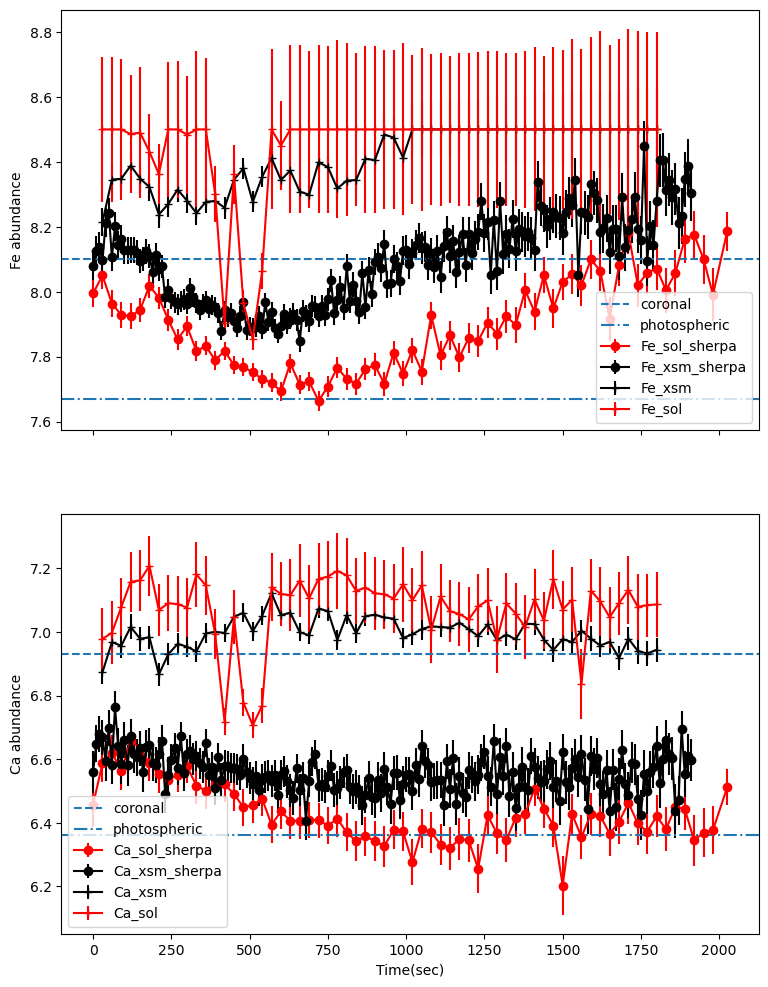

In [117]:
fig,ax=plt.subplots(2,1,figsize=(9,12),gridspec_kw={'height_ratios':(2,2)},sharex=True)

ax[0].errorbar(time_sol,fe_abun_sol,yerr=fe_abun_sol_err,fmt='o',linestyle='-',color='red',label='Fe_sol_sherpa')
ax[0].errorbar(time_xsm,fe_abun_x,yerr=fe_abun_err_x,fmt='o',linestyle='-',color='black',label='Fe_xsm_sherpa')
ax[0].errorbar(Fe_xsm_time,Fe_xsm_abun,yerr=Fe_xsm_err,fmt='+',linestyle='-',color='black',label='Fe_xsm')
ax[0].errorbar(Fe_sol_time,Fe_sol_abun,yerr=Fe_sol_err,fmt='+',linestyle='-',color='red',label='Fe_sol')
ax[0].axhline(y=8.10,linestyle='--',label='coronal')
ax[0].axhline(y=7.67,linestyle='-.',label='photospheric')
ax[0].set_ylabel('Fe abundance')
ax[0].legend()
ax[1].errorbar(time_sol,ca_abun_sol,yerr=ca_abun_sol_err,fmt='o',linestyle='-',color='red',label='Ca_sol_sherpa')
ax[1].errorbar(time_xsm,ca_abun_x,yerr=ca_abun_err_x,fmt='o',linestyle='-',color='black',label='Ca_xsm_sherpa')
ax[1].errorbar(Ca_xsm_time,Ca_xsm_abun,yerr=Ca_xsm_err,fmt='+',linestyle='-',color='black',label='Ca_xsm')
ax[1].errorbar(Ca_sol_time,Ca_sol_abun,yerr=Ca_sol_err,fmt='+',linestyle='-',color='red',label='Ca_sol')
ax[1].axhline(y=6.93,linestyle='--',label='coronal')
ax[1].axhline(y=6.36,linestyle='-.',label='photospheric')
ax[1].set_ylabel('Ca abundance')
ax[1].set_xlabel('Time(sec)')
plt.legend()
plt.show()


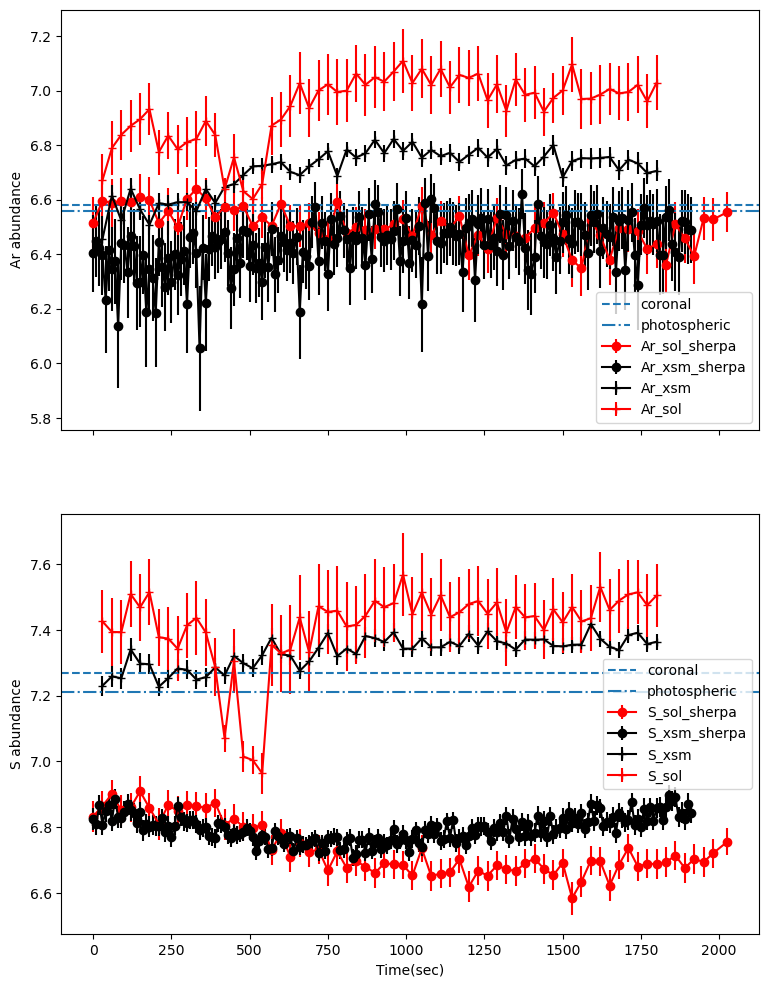

In [119]:
fig,ax=plt.subplots(2,1,figsize=(9,12),gridspec_kw={'height_ratios':(2,2)},sharex=True)

ax[0].errorbar(time_sol,ar_abun_sol,yerr=ar_abun_sol_err,fmt='o',linestyle='-',color='red',label='Ar_sol_sherpa')
ax[0].errorbar(time_xsm,ar_abun_x,yerr=ar_abun_err_x,fmt='o',linestyle='-',color='black',label='Ar_xsm_sherpa')
ax[0].errorbar(Ar_xsm_time,Ar_xsm_abun,yerr=Ar_xsm_err,fmt='+',linestyle='-',color='black',label='Ar_xsm')
ax[0].errorbar(Ar_sol_time,Ar_sol_abun,yerr=Ar_sol_err,fmt='+',linestyle='-',color='red',label='Ar_sol')
ax[0].axhline(y=6.58,linestyle='--',label='coronal')
ax[0].axhline(y=6.56,linestyle='-.',label='photospheric')
ax[0].set_ylabel('Ar abundance')
ax[0].legend()
ax[1].errorbar(time_sol,s_abun_sol,yerr=s_abun_sol_err,fmt='o',linestyle='-',color='red',label='S_sol_sherpa')
ax[1].errorbar(time_xsm,s_abun_x,yerr=s_abun_err_x,fmt='o',linestyle='-',color='black',label='S_xsm_sherpa')
ax[1].errorbar(S_xsm_time,S_xsm_abun,yerr=S_xsm_err,fmt='+',linestyle='-',color='black',label='S_xsm')
ax[1].errorbar(S_sol_time,S_sol_abun,yerr=S_sol_err,fmt='+',linestyle='-',color='red',label='S_sol')
ax[1].axhline(y=7.27,linestyle='--',label='coronal')
ax[1].axhline(y=7.21,linestyle='-.',label='photospheric')
ax[1].set_ylabel('S abundance')
ax[1].set_xlabel('Time(sec)')
plt.legend()
plt.show()


In [40]:
from scipy.interpolate import interp1d
import numpy as np
from scipy.signal import correlate
from astropy.io import fits
import glob
import os
from datetime import datetime

In [52]:

files1=fits.open("paper/ch2_xsm_20240912_2_binwise_corrected.pha")
files2 = sorted(glob.glob("paper/al1_20240912/" + "*.pi"))
file3=fits.open("/mnt/c/Users/User/Downloads/work/AL1_SOLEXS_20240912_SDD2_L1.lc")
rsp1=fits.open("/home/soumya/xsmdas_directory/xsmdas/caldb/CH2xsmresponse20200423v01.rmf")
rsp2=fits.open("/mnt/c/users/user/downloads/heasoft-6.34/x86_64-pc-linux-gnu-libc2.35/solexs_tools-1.0/solexs_tools-1.0/CALDB/response/rmf/solexs_gaussian_SDD2_v1.rmf")
times=[]
t=file3[1].data
time=t['Time'][0]

rsp1d=rsp1[1].data
rsp2d=rsp2[1].data
xsm_energy=(rsp1d['E_MIN'][52:288]+rsp1d['E_MAX'][52:288])/2
solexs_energy=(rsp2d['E_MIN'][46:188]+rsp2d['E_MAX'][46:188])/2
energy_shifts=[]
 # common energy grid
common_energy = np.arange(2.2, 10.0, 0.18)
bin_width=0.1



In [53]:
solexs=[]
xsm=[]

In [54]:
for i, file in enumerate(files2):

    
    tim=time + i*30
    
                   
    times.append(tim)
    files1d=files1[1].data
    xsm_counts=files1d['COUNTS'][i,52:288]
    fil=fits.open(file)
    files2d=fil[1].data #solexs data retriving using looping
    solexs_counts=files2d['COUNTS'][46:188]

    # Interpolate for one spectrum
    f_xsm = interp1d(xsm_energy, xsm_counts, kind='linear', fill_value='extrapolate')
    xsm_interp = f_xsm(common_energy)
    xsm.append(xsm_interp)

    f_solexs = interp1d(solexs_energy, solexs_counts, kind='linear', fill_value='extrapolate')
    solexs_interp = f_solexs(common_energy)
    solexs.append(solexs_interp)
    correlation = correlate(solexs_interp, xsm_interp, mode='valid')
    shift_index = np.argmax(correlation) - (len(xsm_interp) - 1)
    energy_shift = shift_index * bin_width  # if bin_width = 0.1 keV
    energy_shifts.append(energy_shift)


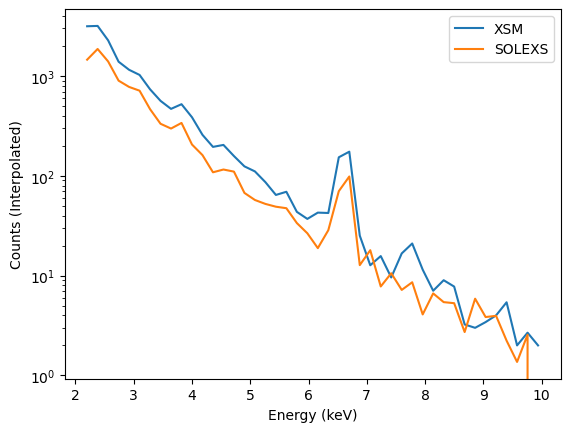

In [55]:
import matplotlib.pyplot as plt
plt.plot(common_energy, xsm[2], label='XSM')
plt.plot(common_energy, solexs[2], label='SOLEXS')
plt.xlabel("Energy (keV)")
plt.ylabel("Counts (Interpolated)")
plt.yscale('log')
plt.legend()
plt.show()

In [39]:
Time=[]
for tim in times:
   solexs_time2utc=" solexs-time2utc " +str(tim).rstrip('.0')
   Time.append(os.system(solexs_time2utc))

usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079400.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079430.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079460.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079490.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079520.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079550.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079580.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument unix_time: invalid int value: '1726079610.0'
usage: solexs-time2utc [-h] unix_time
solexs-time2utc: error: argument u

In [29]:
# Load counts and energy bins
xsm_counts = files1[1].data['COUNTS'][i,52:288]
xsm_energy = (rsp1[1].data['E_Min'][52:288] + rsp1[1].data['E_MAX'][52:288]) / 2 

solexs_data = fits.open(files2[i])
solexs_counts = solexs_data[1].data['COUNTS'][46:188]
solexs_energy = (rsp2[1].data['E_MIN'][46:188] + rsp2[1].data['E_MAX'][46:188]) / 2

# Trim both arrays to equal length
min_len = min(len(xsm_counts), len(solexs_counts))
xsm_trimmed = xsm_counts[:min_len]
solexs_trimmed = solexs_counts[:min_len]
# Cross-correlation
correlation = correlate(solexs_trimmed, xsm_trimmed, mode='full')
shift_index = np.argmax(correlation) - (min_len - 1)

# Energy shift (rough approximation)
# Use average bin width (e.g., if bin edges are close to uniform)
approx_bin_width = np.mean(np.diff(xsm_energy[:min_len]))
energy_shift = shift_index * approx_bin_width

print(f"Uninterpolated energy shift = {energy_shift:.3f} keV")

Uninterpolated energy shift = 0.000 keV


Text(0.5, 1.0, 'Relative Energy Shift Between SOLEXS and XSM')

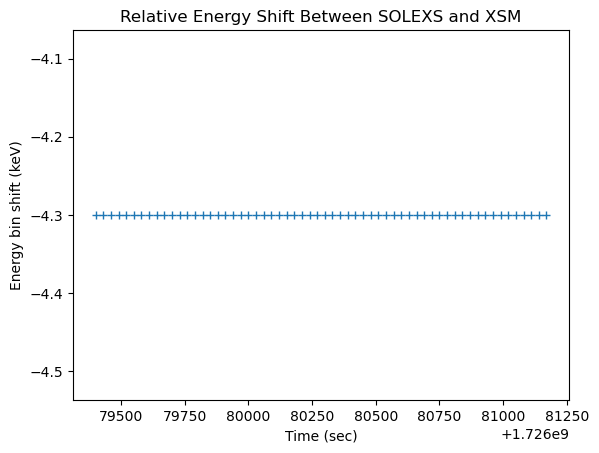

In [56]:
import matplotlib.pyplot as plt

plt.plot(times, energy_shifts,'+')
plt.xlabel("Time (sec)")
plt.ylabel("Energy bin shift (keV)")
plt.title("Relative Energy Shift Between SOLEXS and XSM")
